<a href="https://colab.research.google.com/github/7Horizon/DIFA-TI/blob/main/DIFA_Technical_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/7Horizon/DIFA-TI.git

Cloning into 'DIFA-TI'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Performance der ETFs über 10 Jahre:
Euro Stoxx 50 ETF     96.440374
FTSE 100 ETF          15.571530
DAX ETF               72.037060
CAC 40 ETF           129.203896
AEX ETF              146.886209
IBEX 35 ETF           10.986588
SMI ETF               79.643670
dtype: float64


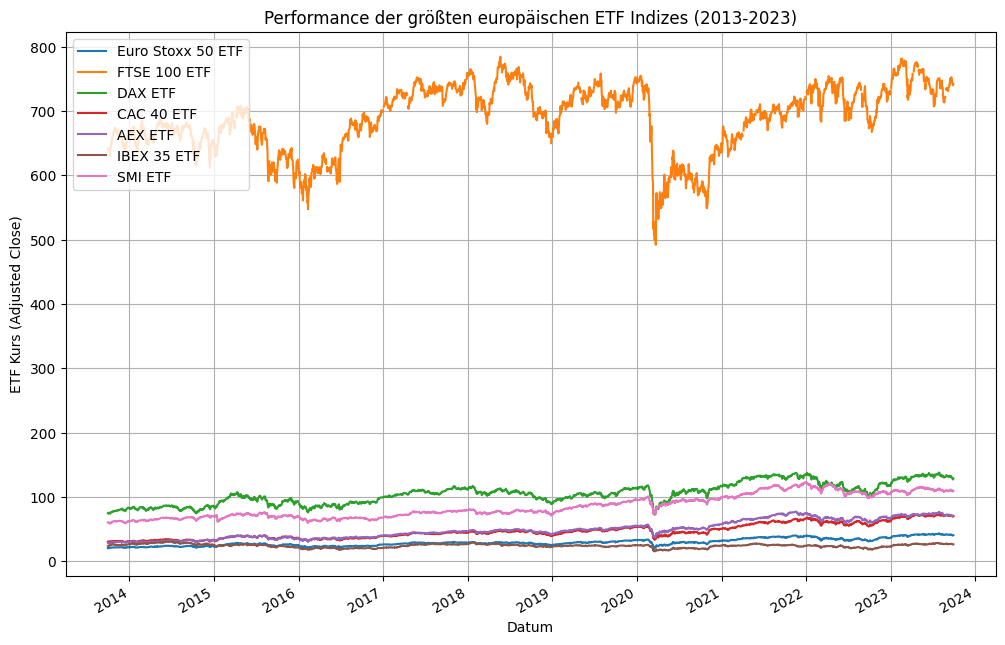


Euro Stoxx 50 ETF - Erste 5 Zeilen:
Date
2013-09-30    20.723700
2013-10-01    20.998262
2013-10-02    20.887732
2013-10-03          NaN
2013-10-04    20.951906
Name: Euro Stoxx 50 ETF, dtype: float64

FTSE 100 ETF - Erste 5 Zeilen:
Date
2013-09-30    641.951111
2013-10-01    641.752075
2013-10-02    639.461792
2013-10-03    640.158691
2013-10-04    640.357971
Name: FTSE 100 ETF, dtype: float64

DAX ETF - Erste 5 Zeilen:
Date
2013-09-30    74.879219
2013-10-01    75.714111
2013-10-02    75.170464
2013-10-03          NaN
2013-10-04    75.131630
Name: DAX ETF, dtype: float64

CAC 40 ETF - Erste 5 Zeilen:
Date
2013-09-30    30.596870
2013-10-01    30.963451
2013-10-02    30.696846
2013-10-03    30.478374
2013-10-04    30.741280
Name: CAC 40 ETF, dtype: float64

AEX ETF - Erste 5 Zeilen:
Date
2013-09-30    28.802715
2013-10-01    29.017349
2013-10-02    28.894688
2013-10-03    28.791208
2013-10-04    28.883194
Name: AEX ETF, dtype: float64

IBEX 35 ETF - Erste 5 Zeilen:
Date
2013-09-30   

In [9]:
# @title
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Liste der Tickersymbole der ETFs, die die großen europäischen Indizes abbilden
etfs = {
    "Euro Stoxx 50 ETF": "EXW1.DE",
    "FTSE 100 ETF": "ISF.L",
    "DAX ETF": "EXS1.DE",
    "CAC 40 ETF": "CAC.PA",
    "AEX ETF": "IAEX.AS",
    "IBEX 35 ETF": "EWP",
    "SMI ETF": "CSSMI.SW"
}

# Zeitperiode (letzte 10 Jahre)
start_date = "2013-09-30"
end_date = "2023-09-30"

# Hier werden die spezifischen Datenkategorien ausgewählt, in diesem Falle der Schlusskurs
data_categories = ['Adj Close']

# Daten abrufen und spezifische Kategorien auswählen
data = {}
for name, ticker in etfs.items():
    index_data = yf.download(ticker, start=start_date, end=end_date)
    data[name] = index_data[data_categories]

# Die abgerufenen Daten in ein DataFrame packen
index_data_etfs = pd.DataFrame({name: data[name]['Adj Close'] for name in etfs})

# Performance der ETFs berechnen (prozentuale Veränderung über 10 Jahre)
performance = (index_data_etfs.iloc[-1] / index_data_etfs.iloc[0] - 1) * 100
print("Performance der ETFs über 10 Jahre:")
print(performance)

# Plot der ETF-Performance über die letzten 10 Jahre
index_data_etfs.plot(figsize=(12, 8), title='Performance der größten europäischen ETF Indizes (2013-2023)')
plt.xlabel("Datum")
plt.ylabel("ETF Kurs (Adjusted Close)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

# Schleife durch alle ETFs und zeige die ersten 5 Zeilen für jeden ETF an
for name in etfs:
    print(f"\n{name} - Erste 5 Zeilen:")
    print(index_data_etfs[name].head())




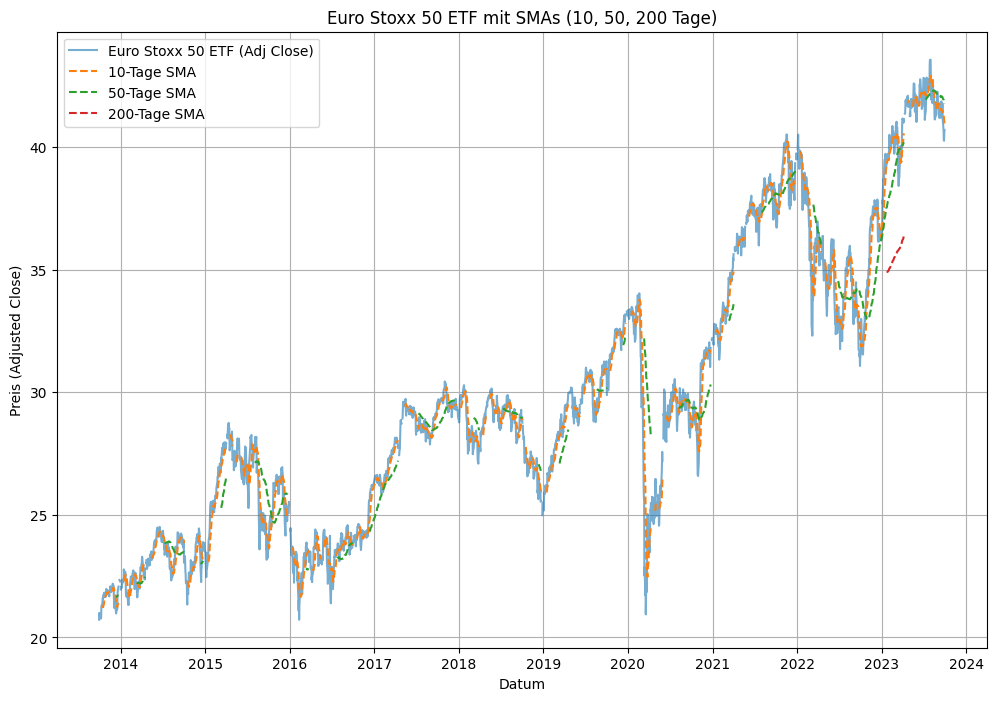

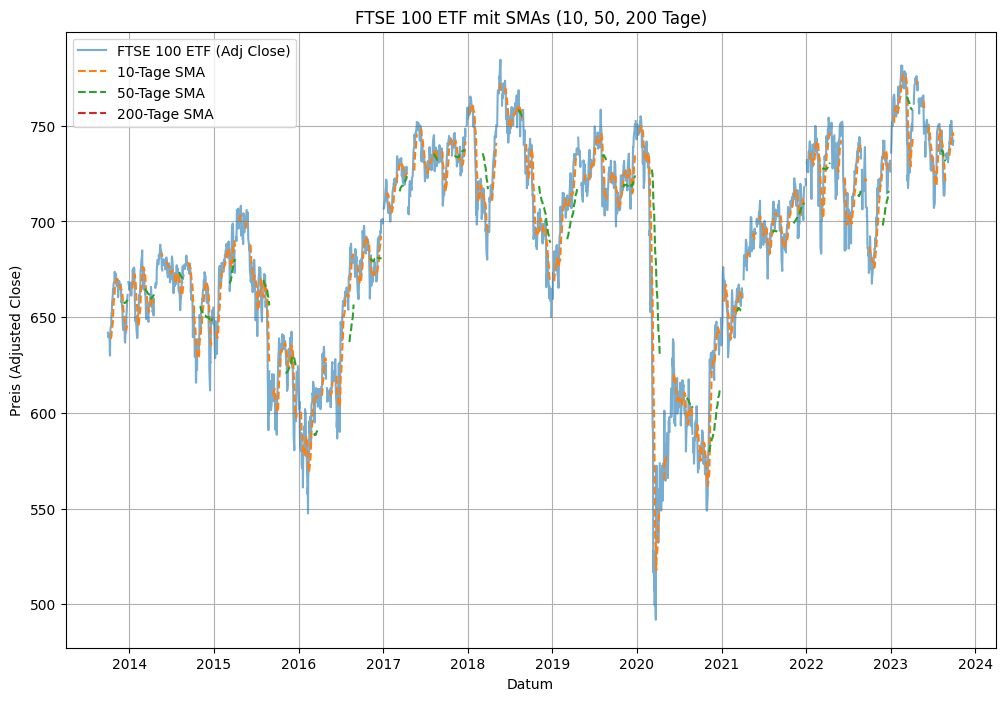

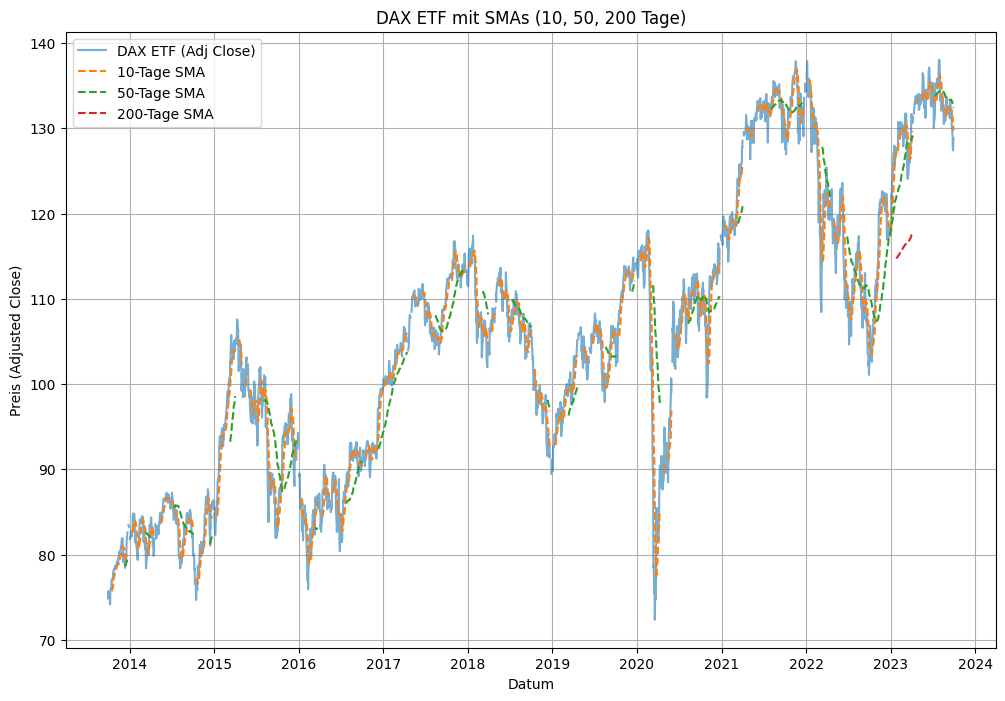

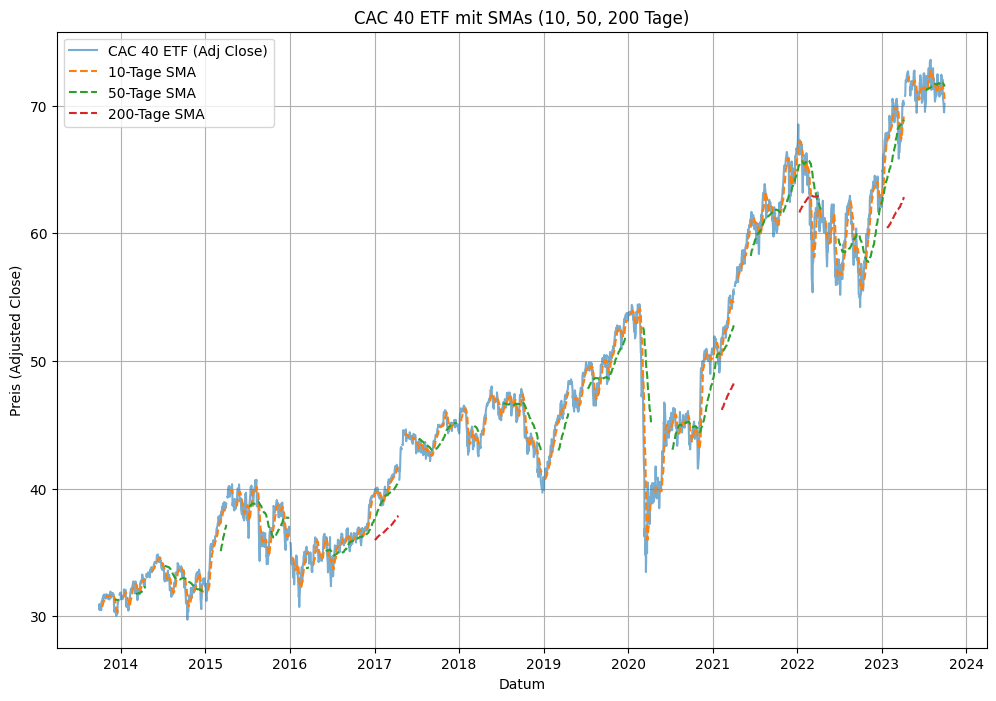

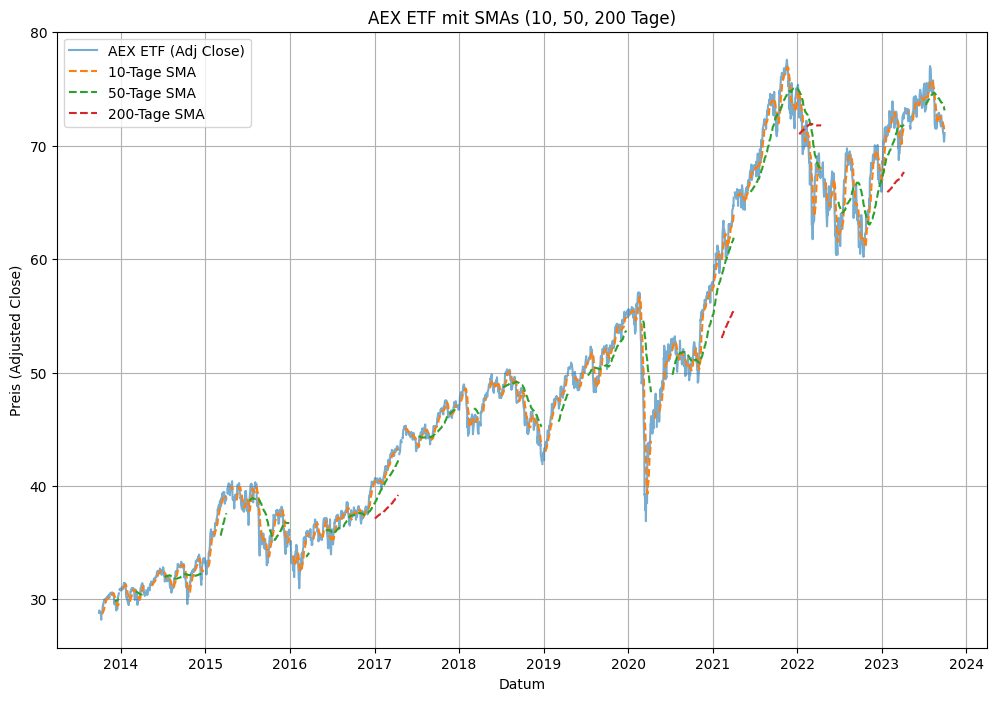

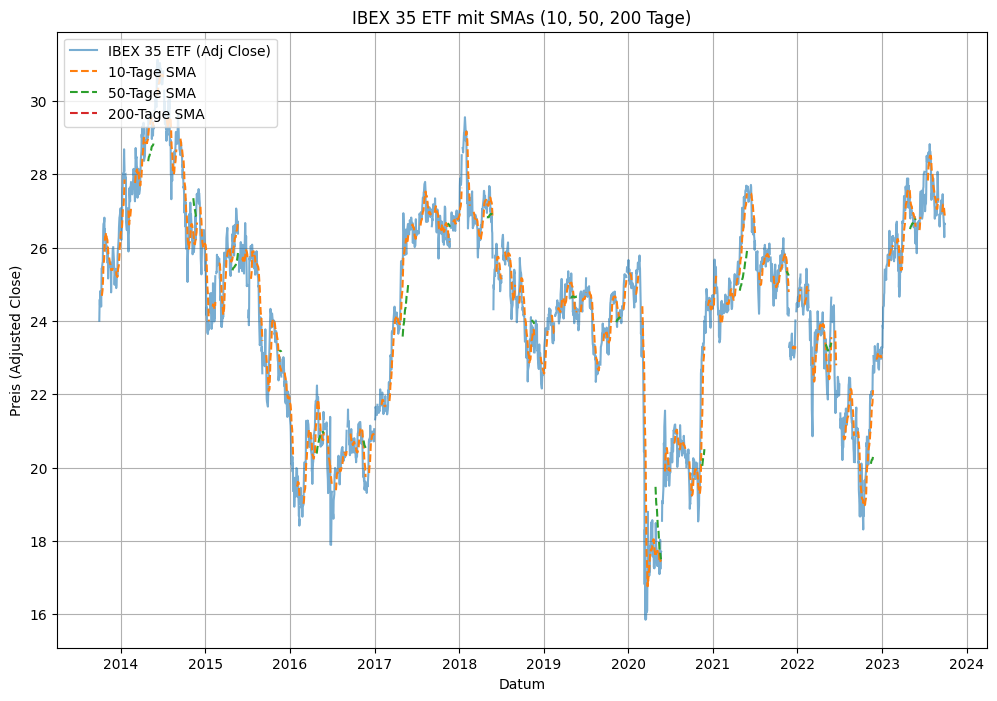

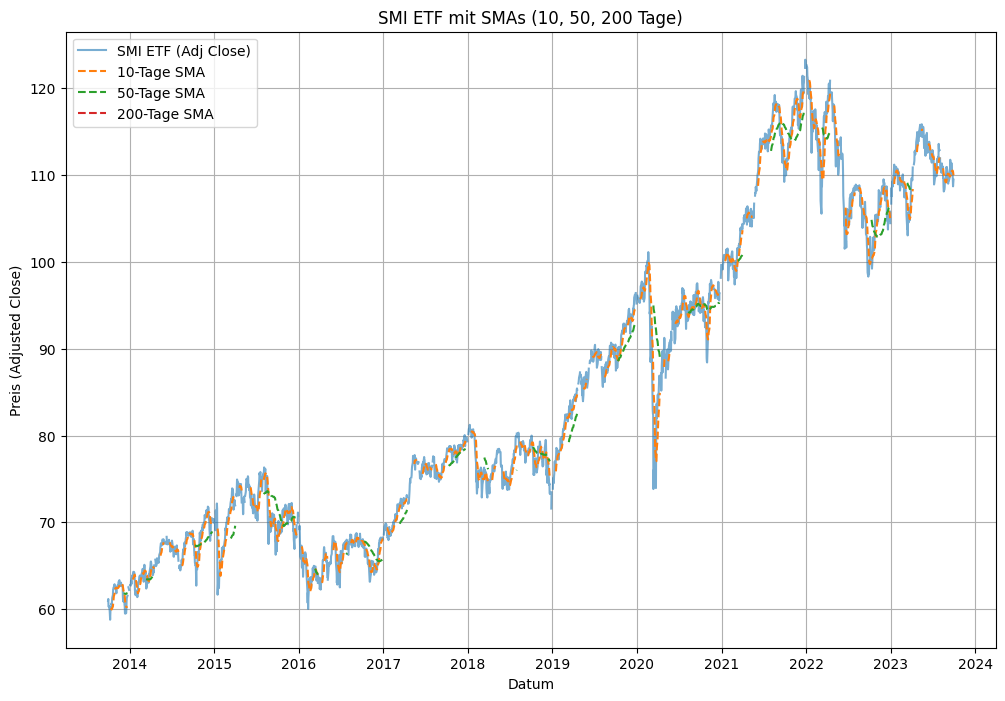

                      SMA_10                                                 \
           Euro Stoxx 50 ETF FTSE 100 ETF     DAX ETF CAC 40 ETF    AEX ETF   
Date                                                                          
2023-09-25         41.381315   746.134326  131.317998  71.258324  71.778029   
2023-09-26         41.267743   746.252649  130.925999  71.085213  71.619886   
2023-09-27         41.173325   746.141046  130.548000  70.943224  71.489970   
2023-09-28         41.053460   745.581256  130.142000  70.758443  71.302889   
2023-09-29         40.936771   744.721600  129.720001  70.529899  71.176536   

                                              SMA_50                           \
           IBEX 35 ETF     SMI ETF Euro Stoxx 50 ETF FTSE 100 ETF     DAX ETF   
Date                                                                            
2023-09-25   27.127279  110.530370         41.948896          NaN  133.001599   
2023-09-26   27.054620  110.499479         

In [18]:
# Berechnung der Simple Moving Averages für 10, 50 und 200 Tage
sma_10 = index_data_etfs.rolling(window=10).mean()
sma_50 = index_data_etfs.rolling(window=50).mean()
sma_200 = index_data_etfs.rolling(window=200).mean()


# Plot der SMAs für jeden ETF
for name in etfs:
    plt.figure(figsize=(12, 8))
    plt.plot(index_data_etfs[name], label=f"{name} (Adj Close)", alpha=0.6)
    plt.plot(sma_10[name], label="10-Tage SMA", linestyle='--')
    plt.plot(sma_50[name], label="50-Tage SMA", linestyle='--')
    plt.plot(sma_200[name], label="200-Tage SMA", linestyle='--')
    plt.title(f"{name} mit SMAs (10, 50, 200 Tage)")
    plt.xlabel("Datum")
    plt.ylabel("Preis (Adjusted Close)")
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

# Zusammenfassen der SMAs in einem DataFrame
sma_table = pd.concat([sma_10, sma_50, sma_200], axis=1, keys=['SMA_10', 'SMA_50', 'SMA_200'])

# Ausgabe der Tabelle mit den SMAs
print(sma_table.tail())  # Zeigt die letzten Zeilen des DataFrames mit den SMAs

# Zusammenfassen der SMAs in einem DataFrame für den Export
sma_table = pd.concat([index_data_etfs, sma_10, sma_50, sma_200], axis=1,
                      keys=['Adjusted Close', 'SMA_10', 'SMA_50', 'SMA_200'])

# Export der Daten in eine Excel-Datei
sma_table.to_excel("sma_data_export.xlsx")

print("Daten wurden erfolgreich nach 'sma_data_export.xlsx' exportiert.")

# Export der Rohdaten der ETFs (index_data_etfs) in eine Excel-Datei
index_data_etfs.to_excel("etf_data_export.xlsx")

print("Rohdaten der ETF-Kurse wurden erfolgreich nach 'etf_data_export.xlsx' exportiert.")

